In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

In [13]:
class MultiLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        n_samples, n_features = X.shape
        n_outputs = y.shape[1]
        self.weights = np.zeros((n_features, n_outputs))
        self.bias = np.zeros((1, n_outputs))

        for _ in range(self.epochs):
            y_pred = X @ self.weights + self.bias
            error = y_pred - y

            dw = (2 / n_samples) * X.T @ error
            db = (2 / n_samples) * np.sum(error, axis=0, keepdims=True)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        X = np.asarray(X)
        return X @ self.weights + self.bias

    def plot(self, X, y):
        y_pred = self.predict(X)
        plt.scatter(y, y_pred, label='Predicted vs Actual')
        plt.xlabel('Actual y')
        plt.ylabel('Predicted y')
        plt.title('Predicted vs Actual Values')
        plt.legend()
        plt.show()

In [14]:
def add_polynomial_features(X, degree=2):
    X_poly = X.copy()
    for power in range(2, degree + 1):
        X_poly = np.hstack((X_poly, X ** power))
    return X_poly


In [19]:
X_poly = add_polynomial_features(X, degree=2)

model = MultiLinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

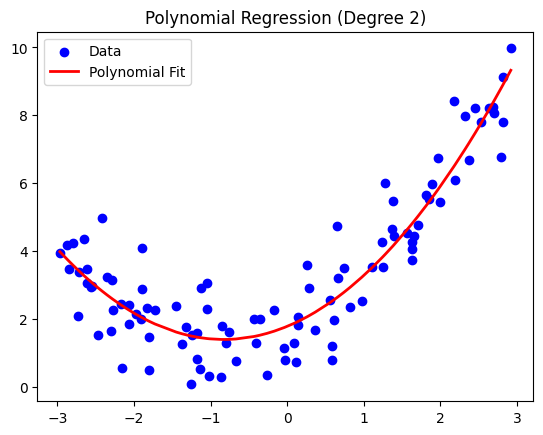

In [ ]:
# Generate sorted values for clean plotting
X_sorted = np.sort(X, axis=0)
X_sorted_poly = add_polynomial_features(X_sorted, degree=2)
y_sorted_pred = model.predict(X_sorted_poly)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='Polynomial Fit')
plt.legend()
plt.title("Polynomial Regression (Degree 2)")
plt.show()

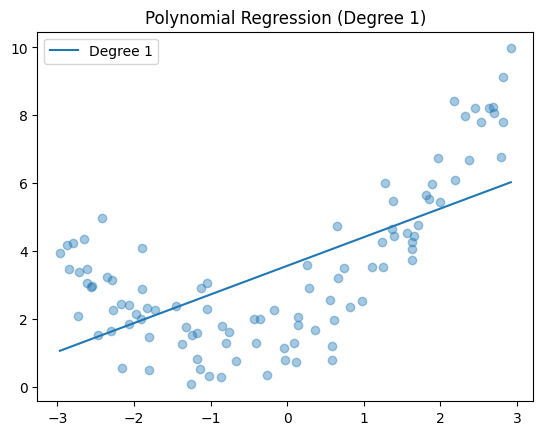

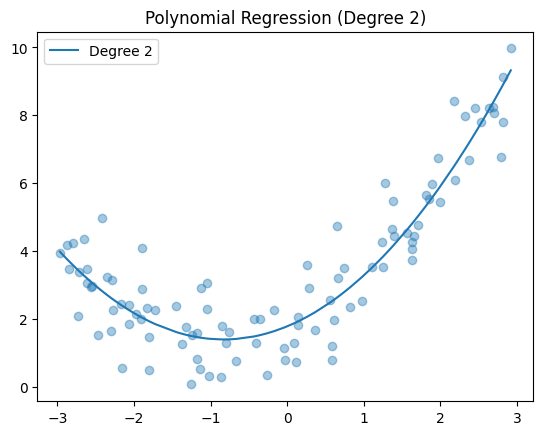

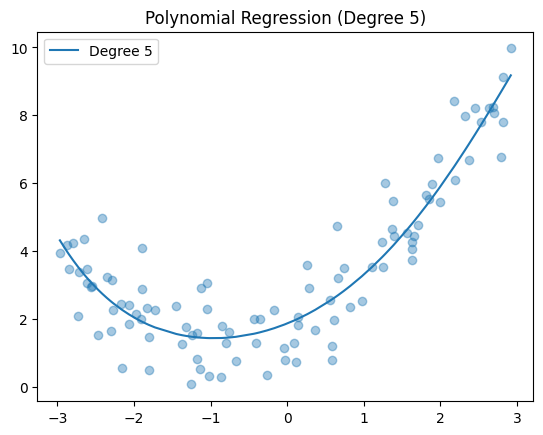

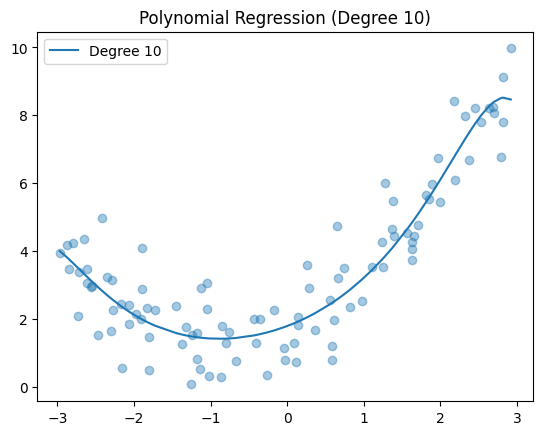

In [21]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

for degree in [1, 2, 5, 10]:
    X_poly = add_polynomial_features(X, degree)
    X_poly = standardize(X_poly)
    model = MultiLinearRegression(learning_rate=0.01, epochs=1000)
    model.fit(X_poly, y)
    X_sorted_poly = add_polynomial_features(X_sorted, degree)
    X_sorted_poly = standardize(X_sorted_poly)
    y_sorted_pred = model.predict(X_sorted_poly)
    
    plt.scatter(X, y, alpha=0.4)
    plt.plot(X_sorted, y_sorted_pred, label=f'Degree {degree}')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()